<a href="https://colab.research.google.com/github/gda2015/datasets/blob/master/Biofuels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

print('Pandas version', pd.__version__)

Pandas version 1.0.3


In [2]:
df = pd.DataFrame(
    {'USA':[105.54, 115.71, 140.29, 183.87, 223.29, 260.61, 334.95, 457.33, 649.68, 746.52, 887.62],
     'BRA':[183.89, 197.59, 216.93, 249.35, 251.72, 276.42, 307.31, 395.68, 486.35, 477.53, 527.32],
     'DEU':[4.3, 5.4, 8.8, 14, 20.4, 35.8, 59.4, 63.8 ,65, 58, 62],
     'IND':[2.9, 3.0, 3.2, 3.3, 3.5, 3.9, 4.5, 4.7, 5.2, 7, 7],
     'YEAR':pd.date_range('20000101', periods = 11, freq="y")
    })

df.set_index('YEAR', inplace=True)

df.info()

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31,105.54,183.89,4.3,2.9
2001-12-31,115.71,197.59,5.4,3.0
2002-12-31,140.29,216.93,8.8,3.2
2003-12-31,183.87,249.35,14.0,3.3
2004-12-31,223.29,251.72,20.4,3.5
2005-12-31,260.61,276.42,35.8,3.9
2006-12-31,334.95,307.31,59.4,4.5
2007-12-31,457.33,395.68,63.8,4.7
2008-12-31,649.68,486.35,65.0,5.2


In [0]:
df.describe()

In [3]:
df.sum()

USA    4105.41
BRA    3570.09
DEU     396.90
IND      48.20
dtype: float64

In [4]:
print("{:,.2f}".format(df.sum().sum()))

8,120.60


In [5]:
df.sum(axis=1)

YEAR
2000-12-31     296.63
2001-12-31     321.70
2002-12-31     369.22
2003-12-31     450.52
2004-12-31     498.91
2005-12-31     576.73
2006-12-31     706.16
2007-12-31     921.51
2008-12-31    1206.23
2009-12-31    1289.05
2010-12-31    1483.94
dtype: float64

In [6]:
df.T

YEAR,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31
USA,105.54,115.71,140.29,183.87,223.29,260.61,334.95,457.33,649.68,746.52,887.62
BRA,183.89,197.59,216.93,249.35,251.72,276.42,307.31,395.68,486.35,477.53,527.32
DEU,4.30,5.40,8.80,14.00,20.40,35.80,59.40,63.80,65.00,58.00,62.00
IND,2.90,3.00,3.20,3.30,3.50,3.90,4.50,4.70,5.20,7.00,7.00


In [9]:
df.style.highlight_max().format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [10]:
df.style.highlight_max(axis=1).format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [11]:
df.style.highlight_max(color='lime').highlight_min(color='pink').format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [12]:
df.style.background_gradient('Blues').format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [13]:
df.style.background_gradient('coolwarm').format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [14]:
def check(val):
    if val < 20:
        return "background-color: orange"
    return ""

df.style.applymap(check).format('{:,.4f}')

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


In [15]:
def top10(col):
    is_top10 = col > col.quantile(0.9)
    return ['background-color:orange' if v else '' for v in is_top10]

df.style.apply(top10).format("{:,.4f}")

,USA,BRA,DEU,IND
YEAR,,,,
2000-12-31 00:00:00,105.5400,183.8900,4.3000,2.9000
2001-12-31 00:00:00,115.7100,197.5900,5.4000,3.0000
2002-12-31 00:00:00,140.2900,216.9300,8.8000,3.2000
2003-12-31 00:00:00,183.8700,249.3500,14.0000,3.3000
2004-12-31 00:00:00,223.2900,251.7200,20.4000,3.5000
2005-12-31 00:00:00,260.6100,276.4200,35.8000,3.9000
2006-12-31 00:00:00,334.9500,307.3100,59.4000,4.5000
2007-12-31 00:00:00,457.3300,395.6800,63.8000,4.7000
2008-12-31 00:00:00,649.6800,486.3500,65.0000,5.2000


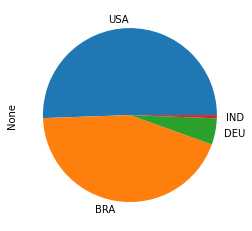

In [16]:
df.sum().plot.pie();

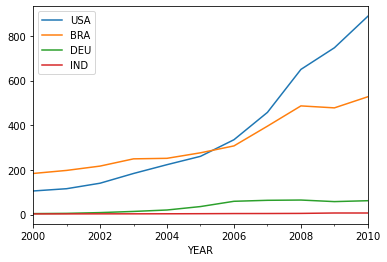

In [18]:
df.plot();

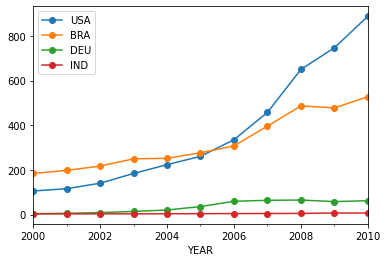

In [19]:
df.plot(marker='o');

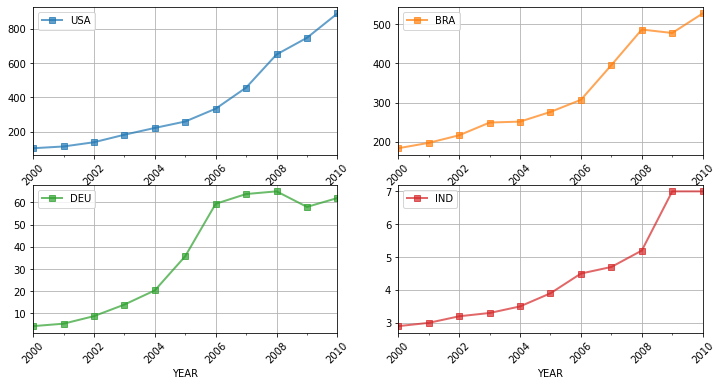

In [20]:
df.plot(
    subplots=True,
    lw=2,
    marker='s',
    alpha=0.7,
    layout=(2,2),
    figsize=(12,6),
    grid=True,
    rot=45,
    sharex=False
);

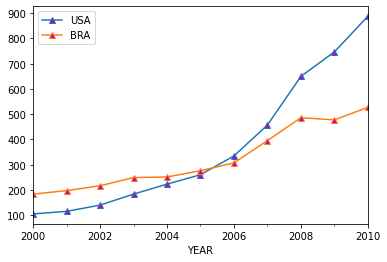

In [21]:
for i, cols in df.iteritems():
    if cols.sum() > 3000:
        cols.plot(label=i, legend=True, marker='^', markerfacecolor='m')    

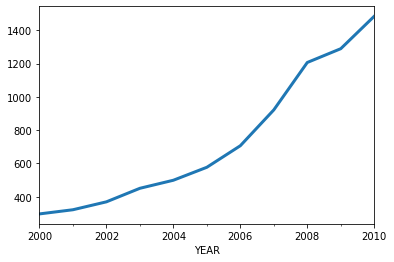

In [17]:
df.sum(axis=1).plot(lw=3);

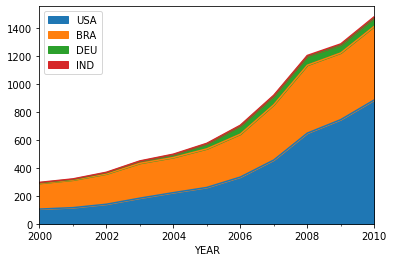

In [22]:
df.plot.area();

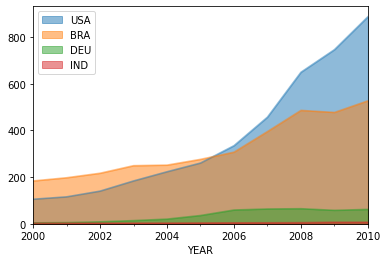

In [23]:
df.plot.area(stacked=False);

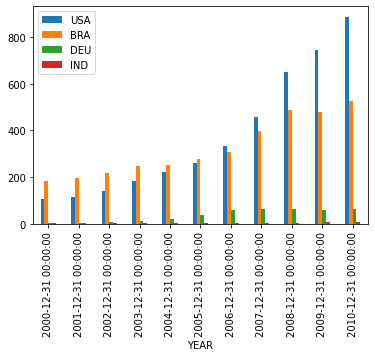

In [26]:
df.plot.bar();

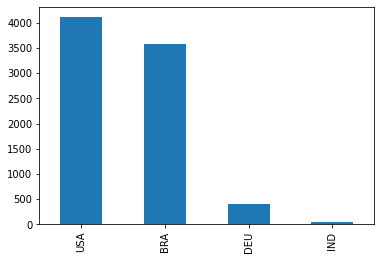

In [27]:
df.sum().plot.bar();

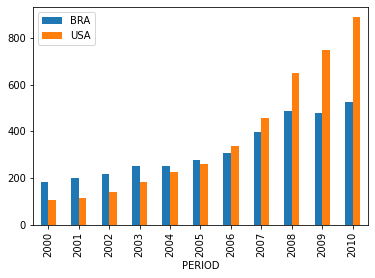

In [24]:
df.assign(PERIOD = df.index.year)\
.plot.bar(x='PERIOD', y=['BRA','USA']);

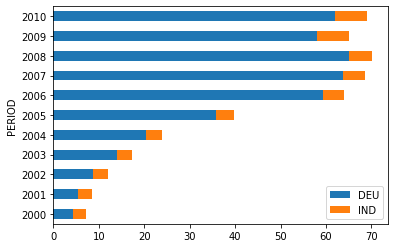

In [29]:
df.assign(PERIOD = df.index.year)\
.plot.barh(x='PERIOD', y=['DEU','IND'], stacked=True);

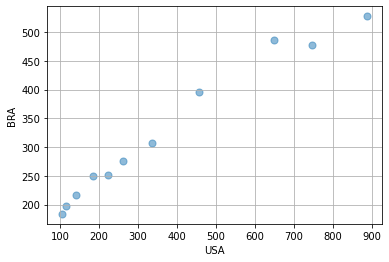

In [31]:
df.plot.scatter(x='USA', y='BRA', s=50, alpha=.5, grid=True);

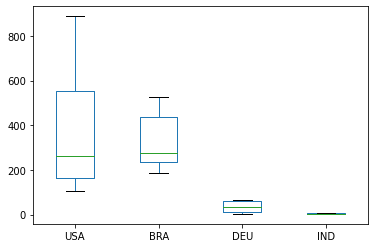

In [32]:
df.plot.box();

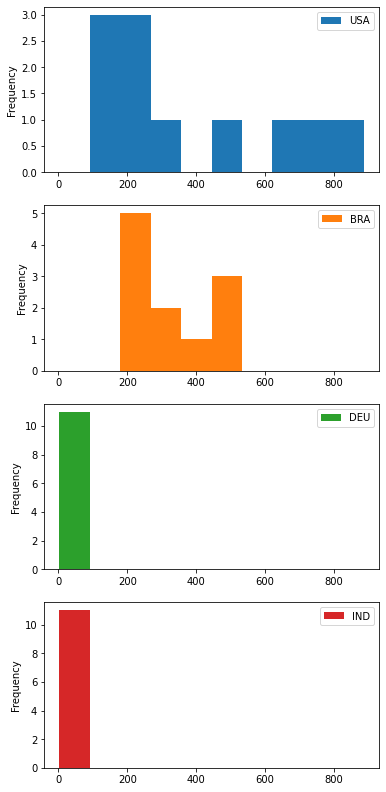

In [33]:
df.plot.hist(subplots=True,figsize=(6, 14), sharex=False);

In [34]:
df.reset_index().melt(id_vars=['YEAR'], var_name=['COUNTRY'], value_name='PRODUCTION')

,YEAR,COUNTRY,PRODUCTION
0,2000-12-31,USA,105.54
1,2001-12-31,USA,115.71
2,2002-12-31,USA,140.29
3,2003-12-31,USA,183.87
4,2004-12-31,USA,223.29
5,2005-12-31,USA,260.61
6,2006-12-31,USA,334.95
7,2007-12-31,USA,457.33
8,2008-12-31,USA,649.68
9,2009-12-31,USA,746.52


In [37]:
xf = df.reset_index().melt(id_vars=['YEAR'], var_name=['COUNTRY'], value_name='PRODUCTION')

xf.pivot_table(index='COUNTRY', columns='YEAR', values='PRODUCTION', aggfunc=sum, margins=True)

YEAR,2000-12-31 00:00:00,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,All
COUNTRY,,,,,,,,,,,,
BRA,183.89,197.59,216.93,249.35,251.72,276.42,307.31,395.68,486.35,477.53,527.32,3570.09
DEU,4.30,5.40,8.80,14.00,20.40,35.80,59.40,63.80,65.00,58.00,62.00,396.90
IND,2.90,3.00,3.20,3.30,3.50,3.90,4.50,4.70,5.20,7.00,7.00,48.20
USA,105.54,115.71,140.29,183.87,223.29,260.61,334.95,457.33,649.68,746.52,887.62,4105.41
All,296.63,321.70,369.22,450.52,498.91,576.73,706.16,921.51,1206.23,1289.05,1483.94,8120.60
